In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## load data

difficultGage = pd.read_csv("data/6_20/difficult.csv", usecols=["datetime", "01_00060"], parse_dates=True, index_col="datetime")
difficultGage.columns = ["Difficult"]
acesGage = pd.read_csv("data/6_20/streamdata.csv", parse_dates=True, index_col="time")
acesGage.columns = ["Aspen"]
rfaspenGage = pd.read_csv("data/6_20/rf_aspen.csv", usecols=["datetime", "01_00060"], sep="\t", parse_dates=True, index_col="datetime")
rfaspenGage.columns = ["Stillwater"]

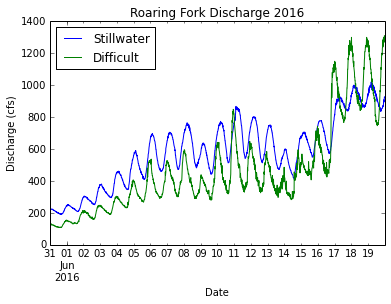

In [91]:
merged = rfaspenGage.merge(difficultGage, right_index=True, left_index=True)
runoff = merged["5/31/16" : "6/19/16"]
plot = runoff.plot()
plot.set_xlabel("Date")
plot.set_ylabel("Discharge (cfs)")
plot.set_title("Roaring Fork Discharge 2016")

In [93]:
plot.get_figure().savefig("plots/diff_v_rfaspen_5_31.png", dpi=200, bbox_inches="tight")


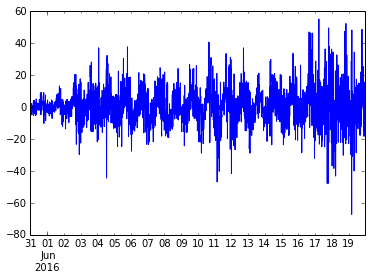

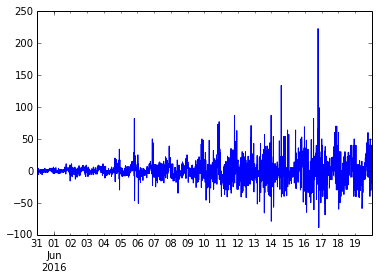

In [49]:
aces_diff = runoff["aces_cfs"].diff()
aces_diff.plot()
plt.figure()

difficult_diff = runoff["diff_cfs"].diff()
difficult_diff.plot()


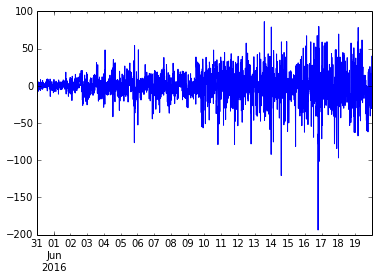

In [47]:
(aces_diff - difficult_diff).plot()

In [77]:
## do the same thing for 2015, with raw data this time.

rfaspen15 = pd.read_csv("data/6_20/rf_aspen_2015.tsv", comment="#", usecols=["datetime", "01_00060"], sep="\t", parse_dates=True, index_col="datetime")
difficult15 = pd.read_csv('data/6_20/difficult_2015.tsv',comment="#", usecols=["datetime", "01_00060"], sep="\t", parse_dates=True, index_col="datetime")



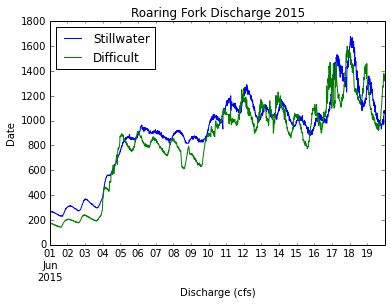

In [86]:
rfaspen15.columns = ["Stillwater"]
difficult15.columns = ["Difficult"]

merged15 = rfaspen15.merge(difficult15, right_index=True, left_index=True)
runoff15 = merged15["6/1/15" : "6/19/15"]


plot15 = runoff15.plot()
plot15.set_title("Roaring Fork Discharge 2015")
plot15.set_xlabel("Discharge (cfs)")
plot15.set_ylabel("Date")
plot15.get_figure().savefig("plots/diff_v_rfaspen_2015.png", dpi=150, bbox_inches="tight")





In [99]:
## and again for 2013

rfaspen13 = pd.read_csv("data/6_20/rf_aspen_13.tsv", comment="#", usecols=["datetime", "01_00060"], sep="\t", parse_dates=True, index_col="datetime")
difficult13 = pd.read_csv('data/6_20/difficult_13.tsv',comment="#", usecols=["datetime", "01_00060"], sep="\t", parse_dates=True, index_col="datetime")
rfaspen13.columns = ["Stillwater"]
difficult13.columns = ["Difficult"]

merged13 = rfaspen13.merge(difficult13, left_index=True, right_index=True)
runoff13 = merged13["6/1/13" : "7/19/13"]


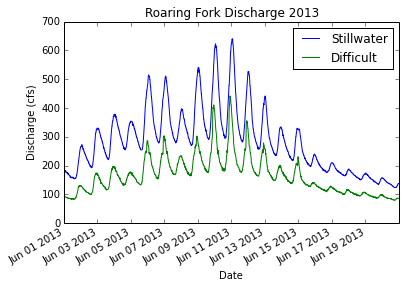

In [100]:
plot13 = runoff13.plot()
plot13.set_title("Roaring Fork Discharge 2013")
plot13.set_ylabel("Discharge (cfs)")
plot13.set_xlabel("Date")